In [7]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI

from typing import TypedDict
from dotenv import load_dotenv

In [9]:
load_dotenv()

model = ChatOpenAI()

In [16]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percentage: float
    summary: str

In [27]:
def calculate_sr(state: BatsmanState):
    sr = state["runs"]/state["balls"]*100

    # return state
    return {"sr": sr}

In [29]:
def calculate_bpb(state: BatsmanState):
    bpb = (state["runs"]/((state["fours"]+state["sixes"])))
    # return state
    return {"bpb": bpb}

In [28]:
def calculate_boundary_percentage(state: BatsmanState):
    boundary_percentage = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100
    # return state    
    return {"boundary_percentage": boundary_percentage}

In [37]:
def summary(state: BatsmanState):
    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percentage']}
"""
    return {"summary": summary}

In [38]:
graph = StateGraph(BatsmanState)

graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("generate_summary", summary)

graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundary_percentage")

graph.add_edge("calculate_sr", "generate_summary")
graph.add_edge("calculate_boundary_percentage", "generate_summary")
graph.add_edge("calculate_bpb", "generate_summary")

graph.add_edge("generate_summary", END)

workflow = graph.compile()




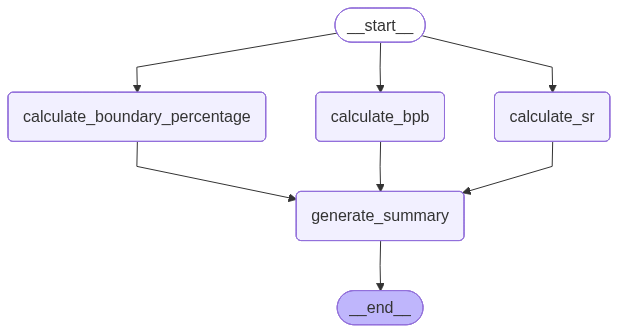

In [25]:
workflow

In [39]:
initial_state = {
    "runs": 100,
    "balls": 50,
    "fours": 6,
    "sixes": 4
}

workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 10.0,
 'boundary_percentage': 48.0,
 'summary': '\nStrike Rate - 200.0 \n\nBalls per boundary - 10.0 \n\nBoundary percent - 48.0\n'}